In [2]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patterns.cluster_k_means as cluster_k_means

In [3]:
# create a multi-index dataframe header
header = pd.MultiIndex.from_product([['heart_rate', 'steps'],
                                     ['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00',
                                      '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
                                      '21:00', '22:00', '23:00']],
                                      names=['type', 'time'])

# Generate dummy data
num_rows = 100
num_columns = 48
data = np.random.choice([True, False], size=(num_rows, num_columns))

# Create DataFrame
person_ids = range(1, num_rows + 1)
df = pd.DataFrame(data, index=person_ids, columns=header)

df.head()

type heart_rate                                                                \
time       0:00   1:00   2:00  3:00   4:00   5:00   6:00   7:00   8:00   9:00   
1          True   True   True  True  False  False   True   True   True   True   
2          True   True   True  True  False   True  False  False   True  False   
3         False   True   True  True   True   True   True   True   True   True   
4          True   True   True  True  False  False  False  False  False  False   
5         False  False  False  True   True   True  False   True   True  False   

type  ...  steps                                                          \
time  ...  14:00  15:00  16:00  17:00  18:00  19:00  20:00  21:00  22:00   
1     ...   True  False  False   True  False  False   True  False  False   
2     ...  False  False  False   True   True  False  False   True  False   
3     ...   True  False   True   True   True  False  False   True  False   
4     ...   True  False   True  False  False   True  False   True   True   
5     ...   True   True  False   True  False  False  False   True   True   

type         
time  23:00  
1      True  
2     False  
3     False  
4     False  
5     False  

[5 rows x 48 columns]

In [4]:
# slicing the dataframe

# get all the heart rates
heart_rates = df.xs('heart_rate', level='type', axis=1)
heart_rates.head()

time,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
1,True,True,True,True,False,False,True,True,True,True,...,True,True,False,True,True,False,True,False,False,False
2,True,True,True,True,False,True,False,False,True,False,...,True,False,True,True,True,True,True,True,False,False
3,False,True,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,False,True,False,True
4,True,True,True,True,False,False,False,False,False,False,...,True,False,True,False,False,False,True,True,True,False
5,False,False,False,True,True,True,False,True,True,False,...,True,False,True,True,False,True,False,False,False,True


In [5]:
# perform kmeans clustering on heart_rates
kmeans = KMeans(n_clusters=3)
kmeans.fit(heart_rates)
kmeans.labels_

/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


array([1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2], dtype=int32)

/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


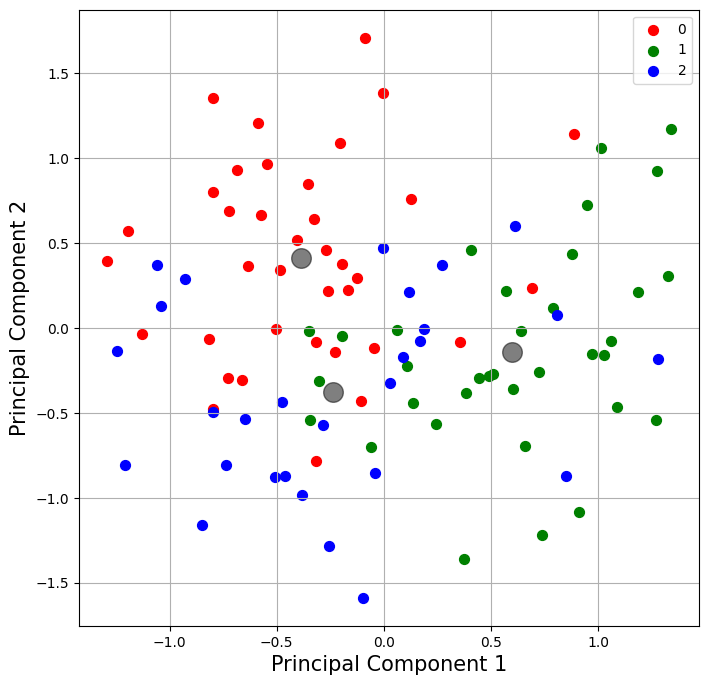

In [6]:
# use PCA to reduce the dimensionality of the data and plot the clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(heart_rates)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# add the cluster labels to the dataframe
principalDf['cluster'] = kmeans.labels_

# plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = principalDf['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],
               principalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)

# add the cluster centers to the plot
centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

ax.grid()


In [41]:
from collections import defaultdict

class Cluster_KMeans(KMeans):
    """Wrapper class for SKLearn KMeans, with relevant pre-processing and tools for clustering."""
    
    def __init__(self, n_clusters):
        super().__init__(n_clusters)

    @classmethod
    def find_n_clusters(cls, missing_data_matrix, clusters: list, method: str):
        """Find the optimal number of clusters for the given data matrix."""

        if method == 'elbow':
            # calculate the sum of squared distances for each number of clusters
            sse = []
            for cluster in clusters:
                kmeans = cls(cluster)
                kmeans.fit(missing_data_matrix)
                sse.append(kmeans.inertia_)
            
            # calculate the elbow point
            elbow_point = np.diff(sse, 2)
            elbow_point = elbow_point.argmax() + 2
            
            # plot the elbow plot with dots at each number of clusters
            plt.plot(clusters, sse, 'o-')
            plt.xlabel('Number of Clusters')
            plt.ylabel('Sum of Squares')
            plt.title('Optimal K Using Elbow Method')

            # draw a vertical line at the elbow point
            plt.axvline(x=elbow_point, color='black', linestyle='--')

            plt.show()

            return elbow_point
        
        elif method == 'silhouette':
            # calculate the silhouette score for each number of clusters
            silhouette_scores = []
            for cluster in clusters:
                if cluster == 1:
                    silhouette_scores.append(0)
                    continue
                kmeans = cls(cluster)
                kmeans.fit(missing_data_matrix)
                silhouette_scores.append(silhouette_score(missing_data_matrix, kmeans.labels_))
            
            # the optimal number of clusters is the one with the highest silhouette score
            optimal_k = clusters[silhouette_scores.index(max(silhouette_scores))]

            # plot the silhouette scores
            plt.plot(clusters, silhouette_scores, 'o-')
            plt.xlabel('Number of Clusters')
            plt.ylabel('Silhouette Score')
            plt.title('Optimal K Using Silhouette Score')
            
            # draw a vertical line at the elbow point
            plt.axvline(x=optimal_k, color='black', linestyle='--')

            plt.show()

            return optimal_k
            
        elif method == 'gap':
            # set max reference distributions
            nrefs = 5
        
            # calculate the gap statistic for each number of clusters
            gaps = np.zeros((len(clusters),))
            results_dic = defaultdict(list)

            # iterate over the range of clusters
            for gap_index, k in enumerate(clusters):
                ref_disps = np.zeros(nrefs)

                # for n references, generate random sample and perform kmeans
                for i in range(nrefs):
                    # create a uniform random reference distribution
                    random_uniform_distribution = np.random.random_sample(size=missing_data_matrix.shape)

                    # fit to the distribution
                    kmeans = cls(k)
                    kmeans.fit(random_uniform_distribution)

                    # calculate the dispersion
                    ref_disp = kmeans.inertia_
                    ref_disps[i] = ref_disp
                
                # calculate dispersion on the original data
                kmeans = cls(k)
                kmeans.fit(missing_data_matrix)

                # get og dispersion
                orig_disp = kmeans.inertia_

                # calculate the gap statistic
                gap = np.log(np.mean(ref_disps)) - np.log(orig_disp)

                # store the results
                gaps[gap_index] = gap
                results_dic[k] = gap
            
            # best k
            optimal_k = gaps.argmax() + 1
                
            # plot the gap statistic
            plt.plot(results_dic.keys(), results_dic.values(), 'o-')
            plt.xlabel('Number of Clusters')
            plt.ylabel('Gap Value')
            plt.title('Optimal K Using Gap Statistic')

            # draw a vertical line at the elbow point
            plt.axvline(x=optimal_k, color='black', linestyle='--')

            plt.show()

            # return optimal number of clusters
            return optimal_k
    
        else:
            raise ValueError("Invalid method. Please choose from 'elbow', 'silhouette', or 'gap'.")

/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shunsakai/Desktop/Fall 2023/Bass F2023/app

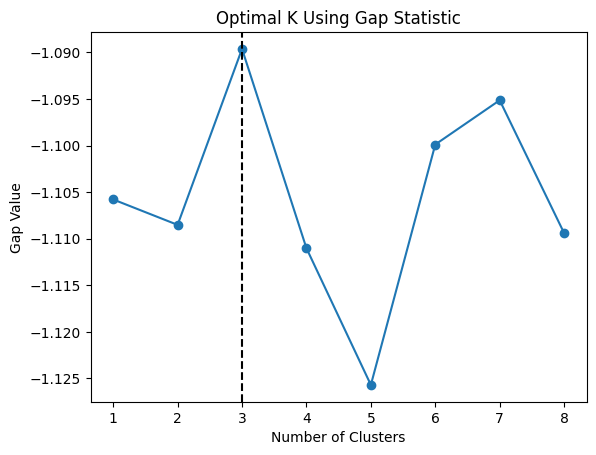

optimal number of clusters: 3


In [45]:
kmeans = Cluster_KMeans(None)
best_k = kmeans.find_n_clusters(heart_rates, clusters=np.arange(1, 9), method='gap')
print("optimal number of clusters:", best_k)

In [33]:
# perform kmeans clustering on heart_rates
kmeans = Cluster_KMeans(n_clusters=3)
kmeans.fit(heart_rates)
kmeans.labels_

/Users/shunsakai/Desktop/Fall 2023/Bass F2023/applewatch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       0, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1], dtype=int32)